In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, FOLPSAXTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles

template = DirectPowerSpectrumTemplate(z=0.51)
theory = FOLPSAXTracerPowerSpectrumMultipoles(template = template)
for param in ['b3', 'n_s']: theory.all_params[param].update(fixed=False)
theory.all_params['n_s'].update(prior={'dist':'norm','lim':[.9,1.1]})

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


In [4]:
theory.varied_params

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'b1', 'b2', 'bs', 'b3', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'])

In [5]:
LRG1 =  '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/pk/pk_LRG1_z0.51_rebin2_ell02.txt'
pk_data = np.loadtxt(LRG1)
pk_data.shape

(80, 3)

In [6]:
cov_data = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/covariances/cov_LRG1_EZmock_unresc.txt'

covariance = np.loadtxt(cov_data)
covariance.shape

(240, 240)

In [5]:
import os

In [6]:
print(os.listdir('/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/matrices'))

['wmat_kout_LRG1_z0.51.txt', 'wmat_kin_QSO_z1.49_rebin.txt', 'wmat_kout_ELG1_z0.96_rebin.txt', 'wmat_kout_LRG3_z0.92.txt', 'wmat_LRG1_z0.51.txt', 'wmat_kout_LRG2_z0.71.txt', 'wmat_kout_BGS_z0.3_rebin.txt', 'wmat_kin_QSO_z1.49.txt', '.ipynb_checkpoints', 'wmat_kin_LRG3_z0.92.txt', 'wmat_kin_LRG2_z0.71.txt', 'wmat_ELG1_z0.96.txt', 'wmat_kout_ELG2_z1.32_rebin.txt', 'wmat_kout_QSO_z1.49.txt', 'wmat_kout_BGS_z0.3.txt', 'wmat_kin_BGS_z0.3.txt', 'wmat_BGS_z0.3_rebin.txt', 'wmat_kin_ELG2_z1.32_rebin.txt', 'wmat_QSO_z1.49.txt', 'wmat_kin_LRG3_z0.92_rebin.txt', 'wmat_LRG3_z0.92_rebin.txt', 'wmat_QSO_z1.49_rebin.txt', 'wmat_kin_ELG2_z1.32.txt', 'wmat_LRG3_z0.92.txt', 'wmat_LRG2_z0.71_rebin.txt', 'wmat_kout_ELG2_z1.32.txt', 'wmat_kin_LRG1_z0.51.txt', 'wmat_ELG2_z1.32.txt', 'wmat_ELG2_z1.32_rebin.txt', 'wmat_kout_LRG1_z0.51_rebin.txt', 'wmat_kout_ELG1_z0.96.txt', 'wmat_LRG1_z0.51_rebin.txt', 'wmat_ELG1_z0.96_rebin.txt', 'wmat_kout_LRG3_z0.92_rebin.txt', 'wmat_kout_QSO_z1.49_rebin.txt', 'wmat_kin_EL

In [7]:
window_LRG1 = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/matrices/wmat_LRG1_z0.51_rebin.txt'
window = np.loadtxt(window_LRG1)


kin_LRG1 =  '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/matrices/wmat_kin_LRG1_z0.51_rebin.txt'
kin = np.loadtxt(kin_LRG1)

window.shape, kin.shape

((240, 525), (175,))

In [8]:
kin = np.array(kin)

In [9]:
theory = FOLPSTracerPowerSpectrumMultipoles(k = kin, template = template)

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


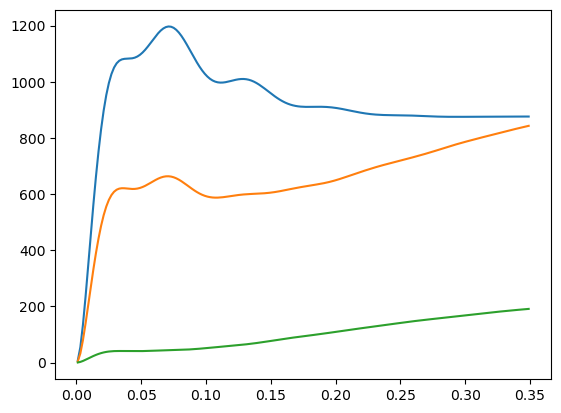

In [10]:
poles = theory()
for i, e in enumerate(theory.ells):
    plt.plot(theory.k, theory.k * poles[i])

In [11]:
P_thy =np.concatenate((poles[0],poles[1],poles[2]))
P_thy.shape

(525,)

***P_obs***

In [12]:
P_obs = np.matmul(window, P_thy)
P_obs.shape

(240,)

In [13]:
P_obs

array([ 3.27567102e+04,  3.57482867e+04,  3.82227563e+04,  3.82446820e+04,
        3.62239003e+04,  3.31210602e+04,  2.97151468e+04,  2.65351013e+04,
        2.38721931e+04,  2.17785137e+04,  2.01731691e+04,  1.89105962e+04,
        1.78269798e+04,  1.67938695e+04,  1.57332841e+04,  1.46266881e+04,
        1.35043368e+04,  1.24216594e+04,  1.14337020e+04,  1.05803258e+04,
        9.87695302e+03,  9.31335839e+03,  8.86302249e+03,  8.49117217e+03,
        8.16212713e+03,  7.84743936e+03,  7.52887505e+03,  7.20048692e+03,
        6.86758229e+03,  6.54110280e+03,  6.23351774e+03,  5.95420892e+03,
        5.70757075e+03,  5.49335641e+03,  5.30733099e+03,  5.14309495e+03,
        4.99393360e+03,  4.85381556e+03,  4.71827633e+03,  4.58501811e+03,
        4.45353361e+03,  4.32474617e+03,  4.20048063e+03,  4.08235082e+03,
        3.97154900e+03,  3.86861653e+03,  3.77316652e+03,  3.68431832e+03,
        3.60094703e+03,  3.52171591e+03,  3.44558861e+03,  3.37192607e+03,
        3.30011176e+03,  

In [23]:
from new_data_function import new_data

In [20]:
P_obs, cov, k = new_data(0.02,0.19,pk_data, covariance, 2)

Dimensiones del vector de datos de multipolos:  (70, 1)
Las dimensiones de la matriz de covarianza son:  (70, 70)


In [21]:
k

[array([0.02269322]), array([0.19252106]), array([0.00485222])]

In [25]:
krange = np.where((0.02 < pk_data[:,0:1]) & (pk_data[:,0:1] < 0.2))

In [26]:
krange

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [28]:
k

[array([0.02269322]), array([0.19252106]), array([0.00485222])]

In [27]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
observable = TracerPowerSpectrumMultipolesObservable(data=P_obs, covariance=cov,
                                                     klim={0: k, 2: k},
                                                     theory=theory)
likelihood = ObservablesGaussianLikelihood(observables=[observable])

from desilike import setup_logging

setup_logging()
likelihood()

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


Array(-7711.09926071, dtype=float64)

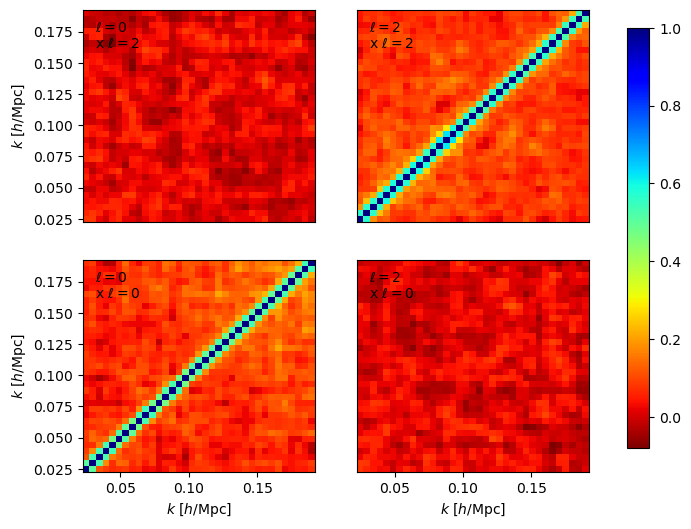

In [29]:
observable.plot_covariance_matrix();

In [17]:
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine
#emulamos la teoría con taylor orden 2
emulator = Emulator(theory, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))
emulator.set_samples()
emulator.fit()
#emulator.plot(name='power')

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed
[000021.13] [0/1] 05-14 23:32  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'].
[000021.13] [0/1] 05-14 23:32  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000022.82] [0/1] 05-14 23:32  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'].
[000031.63] [0/1] 05-14 23:32  Differentiation           INFO     Using finite-differentiation for parameter h.
[000033.35] [0/1] 05-14 23:32  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000035.08] [0/1] 05-14 23:32  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000036.81] [0/1] 05-14 23:32  Differentiation          

In [18]:
from desilike.samplers import EmceeSampler

In [ ]:
observable.init.update(theory=emulator.to_calculator())
#inicializamos el sampler para la teoría emulada
sampler = EmceeSampler(likelihood, save_fn = 'Chains/test_window_FOLPSAX_LRG1_z_0_51', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

[000099.41] [0/1] 05-14 23:33  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2'].
[000099.85] [0/1] 05-14 23:33  EmceeSampler              INFO     Successfully vmap input likelihood.
[000100.21] [0/1] 05-14 23:33  EmceeSampler              INFO     Successfully jit input likelihood.
[000100.46] [0/1] 05-14 23:33  TaskManager               INFO     Entering TaskManager with 1 workers.
[000103.68] [0/1] 05-14 23:34  Chain                     INFO     Saving Chains/test_window_FOLPSAX_LRG1_z_0_51.
[000103.68] [0/1] 05-14 23:34  EmceeSampler              INFO     Diagnostics:
[000103.72] [0/1] 05-14 23:34  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 37; not < 0.15.
[000103.76] [0/1] 05-14 23:34  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 11.
[000103.95] [0/1] 05-14 23:34  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 

In [8]:
from desilike.samples import Chain, plotting

In [26]:
chain = Chain.load('Chains/test_window_FOLPSAX_LRG1_z_0_51.npy').remove_burnin(0)

In [27]:
print(chain.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.745  |  0.742  |  0.742  | 0.016  |  -0.014/+0.015  |  -0.014/+0.014  |
| omega_cdm | 0.1862  | 0.1776  | 0.1763  | 0.0089 | -0.0082/+0.0091 | -0.0105/+0.0059 |
|  omega_b  | 0.02230 | 0.02223 | 0.02224 | 4.2e-4 | -3.6e-4/+3.8e-4 | -3.6e-4/+3.8e-4 |
|   logA    |  2.67   |  2.55   |  2.52   |  0.10  |  -0.096/+0.109  |  -0.126/+0.049  |
|    b1     |  1.70   |  2.01   |  2.06   |  0.25  |   -0.29/+0.26   |   -0.18/+0.33   |
|    b2     |  -0.24  |  0.29   |  0.28   |  0.90  |   -0.87/+0.90   |   -0.91/+0.86   |
|    bs     |   9.7   |   4.6   |   4.9   |  4.4   |    -4.9/+4.6    |    -3.5/+5.8    |
|  alpha0   |   137   |   94    |   91    |   46   |     -45/+47     |     -51/+39     |
|  alpha2   |   -1   

In [9]:
from cosmoprimo.fiducial import DESI

cosmo = DESI()

In [29]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Removed no burn in


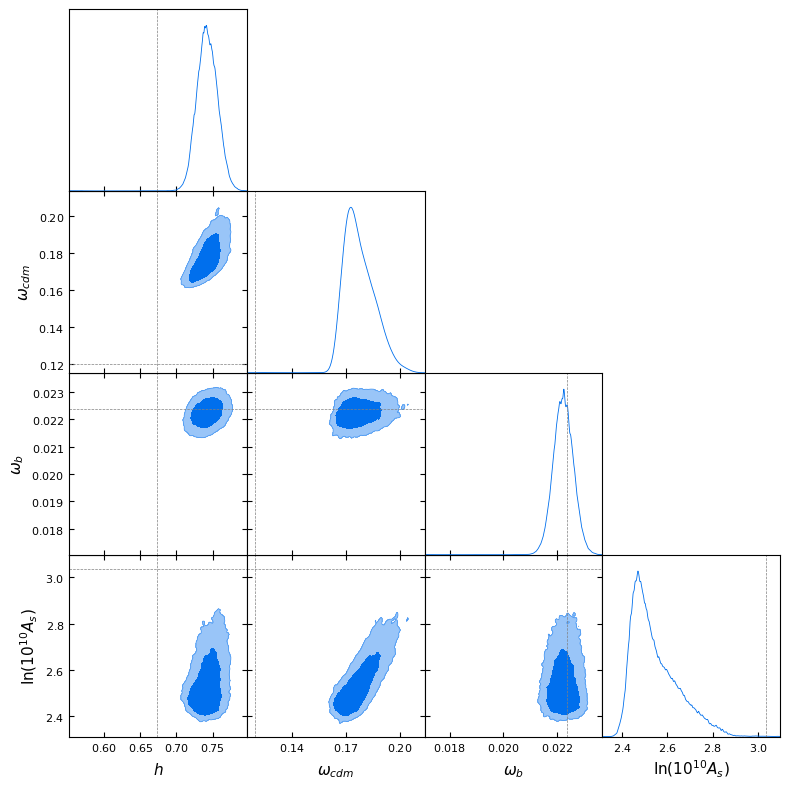

In [30]:
plotting.plot_triangle(chain[::10], filled = True, params = ['h','omega_cdm', 'omega_b', 'logA'], 
                       markers = [cosmo.h, cosmo['omega_cdm'], cosmo['omega_b'], cosmo['logA']], show = True);